#### PROJECT
- 21308225 Kamil Mrowiec - EDA - 20%
- 21302545 Roy Flaherty - Clustering - 20%
- 21306729 Adam Greenan - Clustering - 20%
- 21340005 Caragh Morahan - Classification - 20%
- 21304092 Jason Gill - Classification 20%

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tracks.csv')

print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nDataset Info:")
print(df.info())

print("\nStats Summary:")
print(df.describe())

# checking if there are any missing values
print("\nMissing Values:")
print(df.isnull().sum())

# counts for explicit and mode columns
print("\nExplicit column value counts:")
print(df['explicit'].value_counts())

print("\nMode column value counts:")
print(df['mode'].value_counts())

First 5 rows:
   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          85       202093      True         0.658   0.671    2   -12.210   
1          49       215973     False         0.627   0.505    6   -12.659   
2          65       188160     False         0.807   0.835    9    -6.849   
3          59       233965     False         0.748   0.549    6    -5.447   
4          55       187173     False         0.683   0.869    0    -4.828   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0363       0.09330          0.000927    0.1150    0.166   
1     1       0.0549       0.19700          0.014900    0.0583    0.146   
2     0       0.0631       0.00148          0.527000    0.2330    0.349   
3     0       0.0650       0.00268          0.792000    0.1960    0.197   
4     1       0.0515       0.00088          0.836000    0.2060    0.219   

     tempo  time_signature track_genre  
0  100.966               4     

### Overiew of the data
- The dataset has 1500 rows and 16 columns
- There arent any missing values, which means we don’t have to worry about data cleaning
- Most of the columns are numeric, except for explicit (True/False) and track_genre (genre name)
- Looking at explicit, around 10% of tracks are marked as explicit (157 out of 1500) while the rest are not explicit
- For mode, the majority of songs are in major key (mode = 1)

### Summary of the statistics

- popularity scores are between 0 and 93, with an average of around 28, meaning most tracks in this dataset are not very popular
- duration_ms varies a lot, going from really short tracks to some that are very long like over 14 minutes
- Features like danceability and energy have average values near 0.5 to 0.6, suggesting that the tracks are fairly danceable and energetic overall
- loudness values are negative as expected for audio tracks, with an average around -8 dB with the loudest track being 0.366 dB
- speechiness and instrumentalness both have low median values, which tells us that most tracks are mainly musical rather than being spoken or instrumental
- time_signature is mostly 4, which is typical for popular music

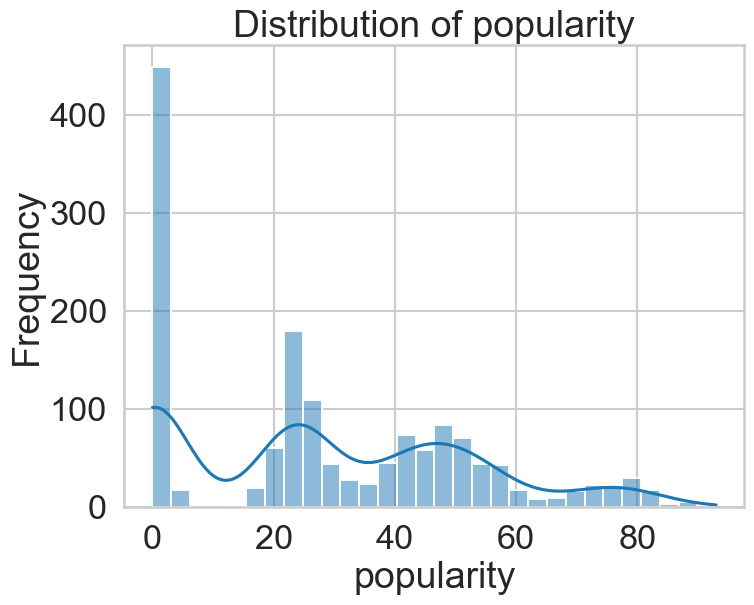

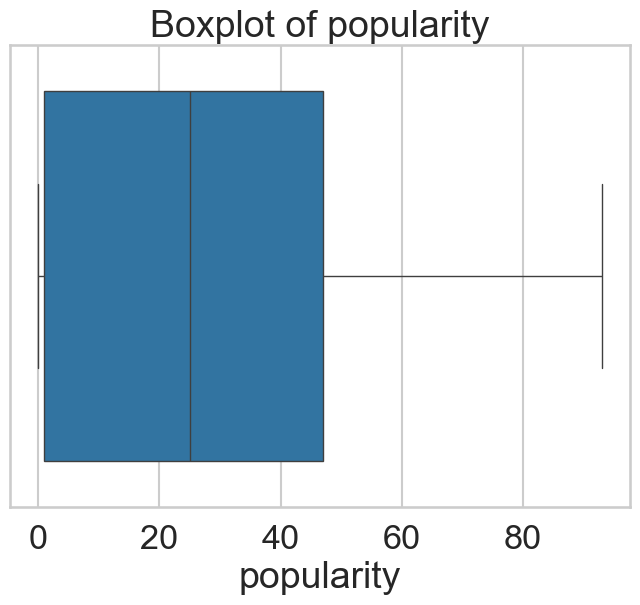

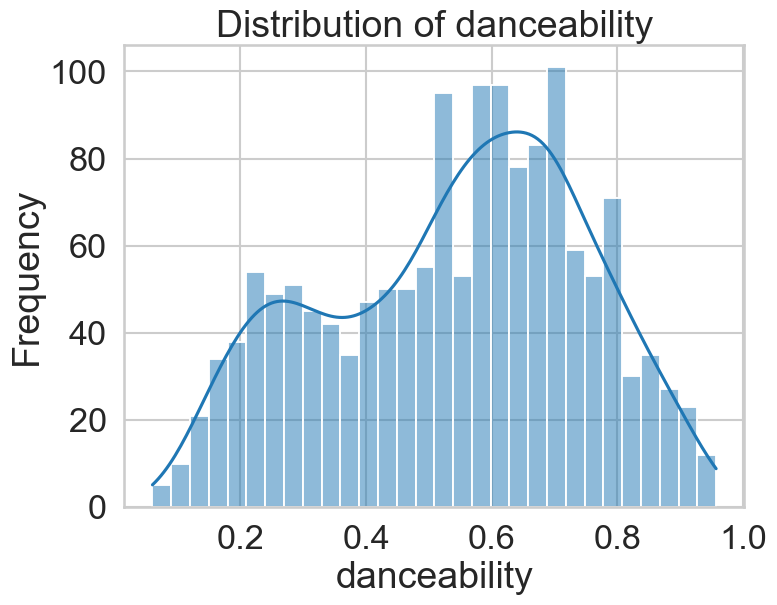

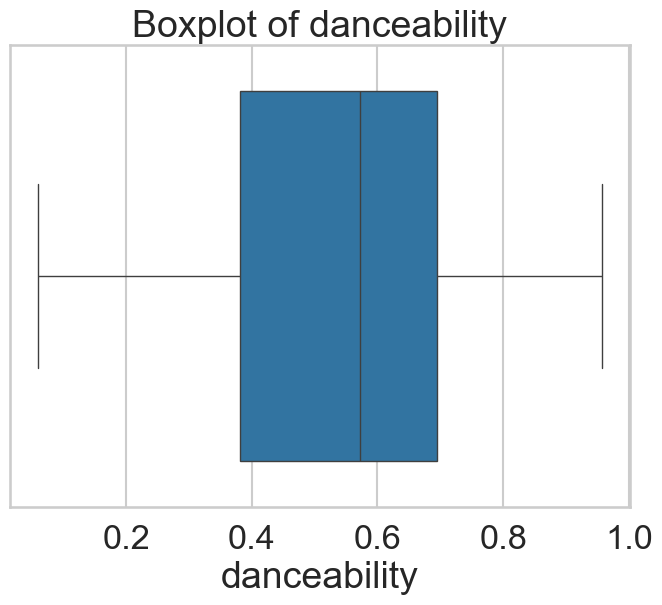

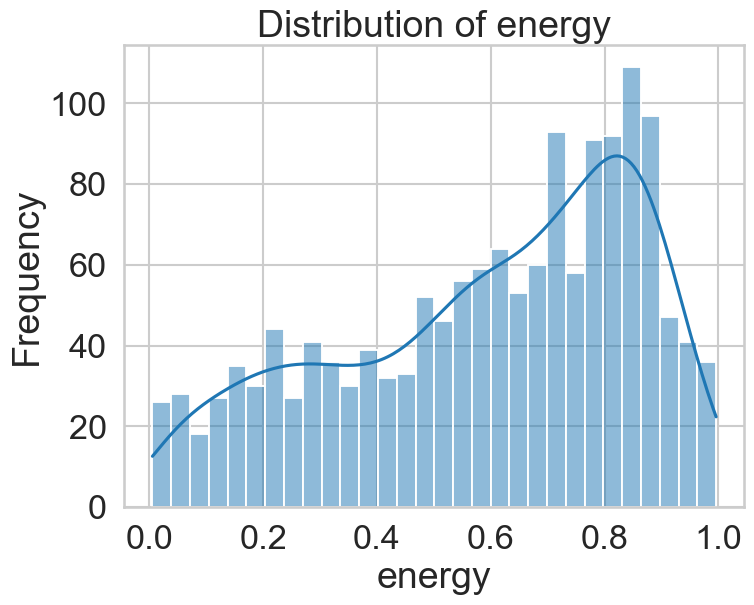

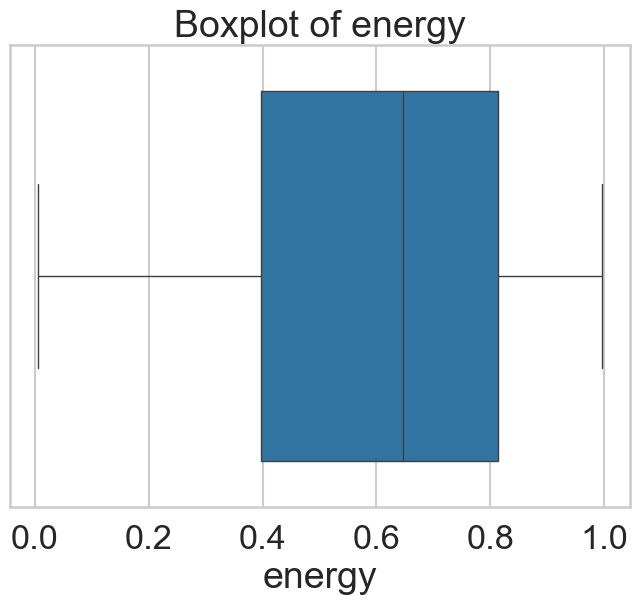

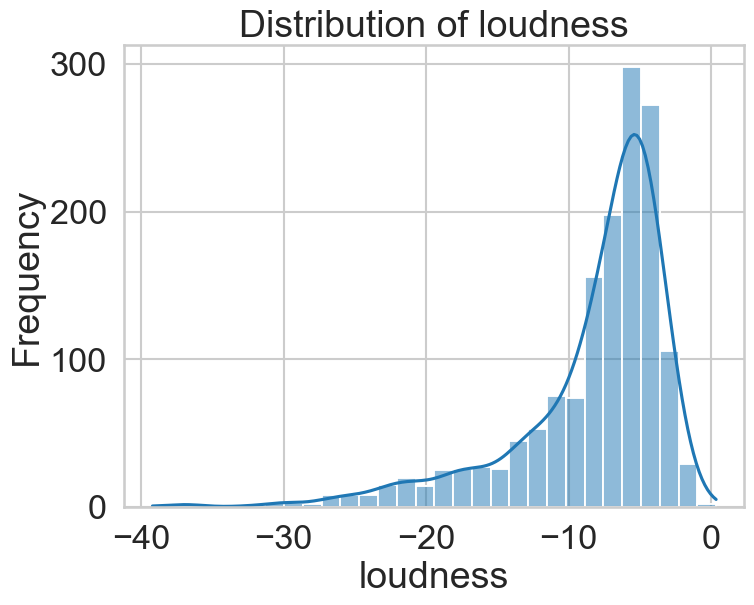

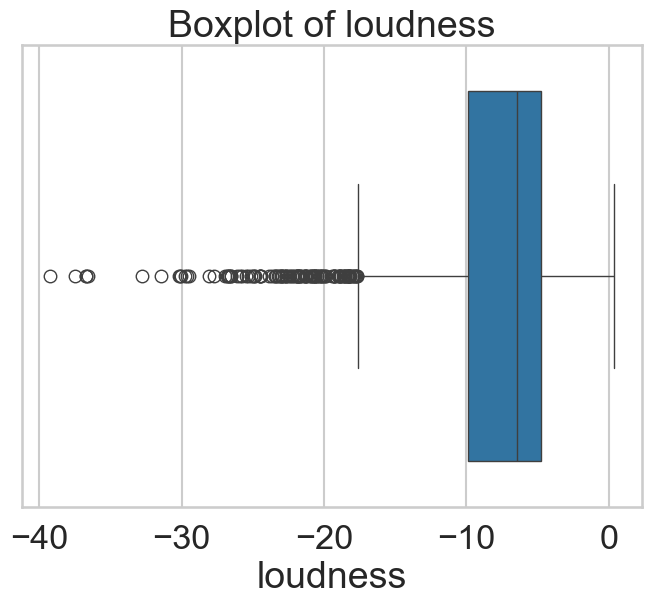

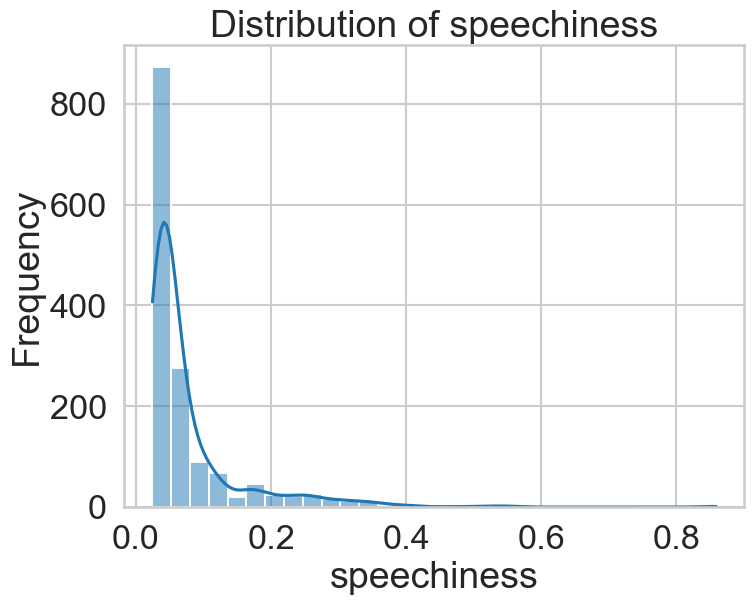

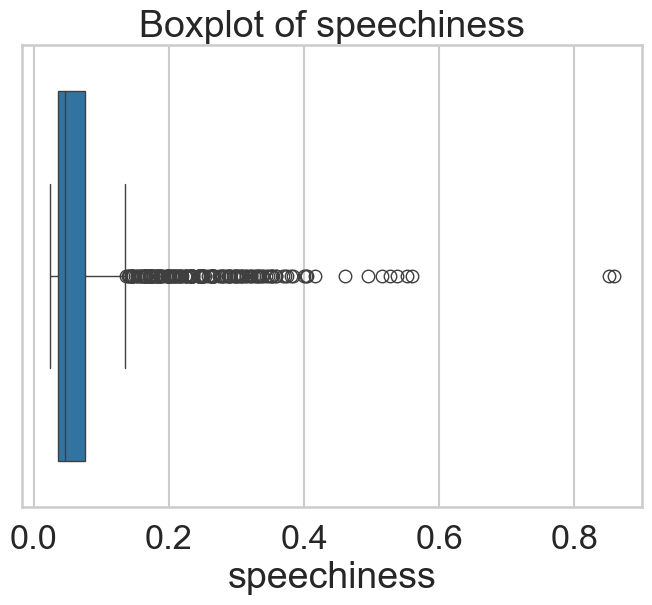

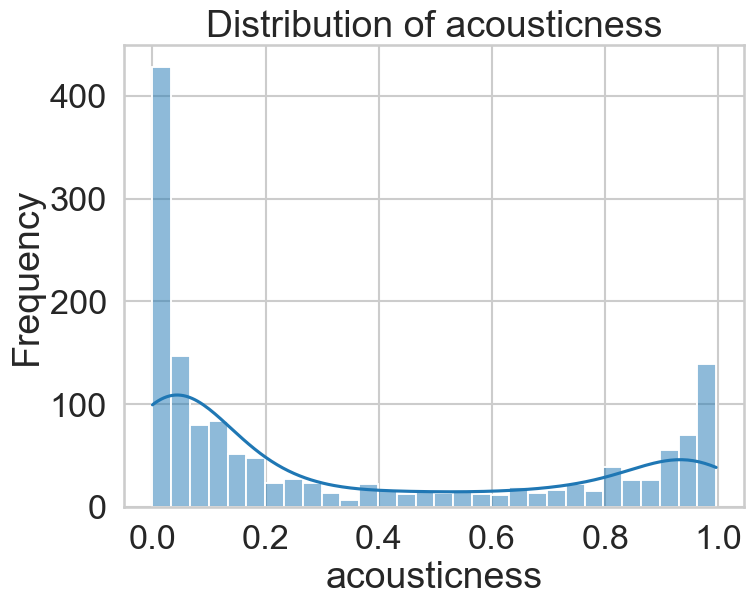

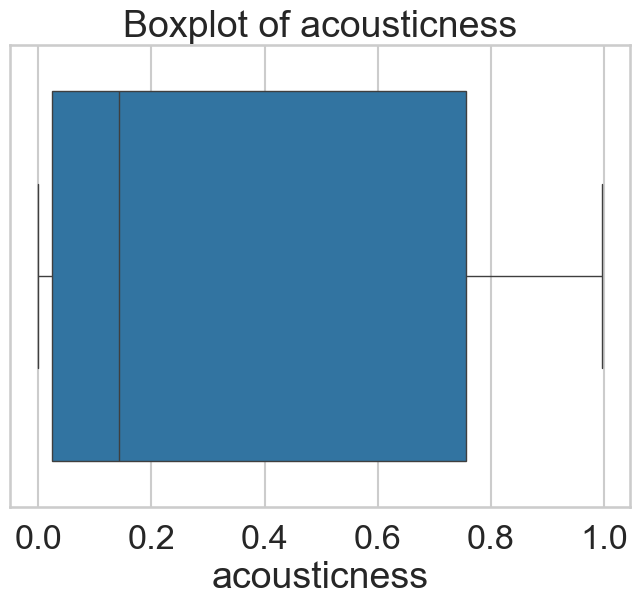

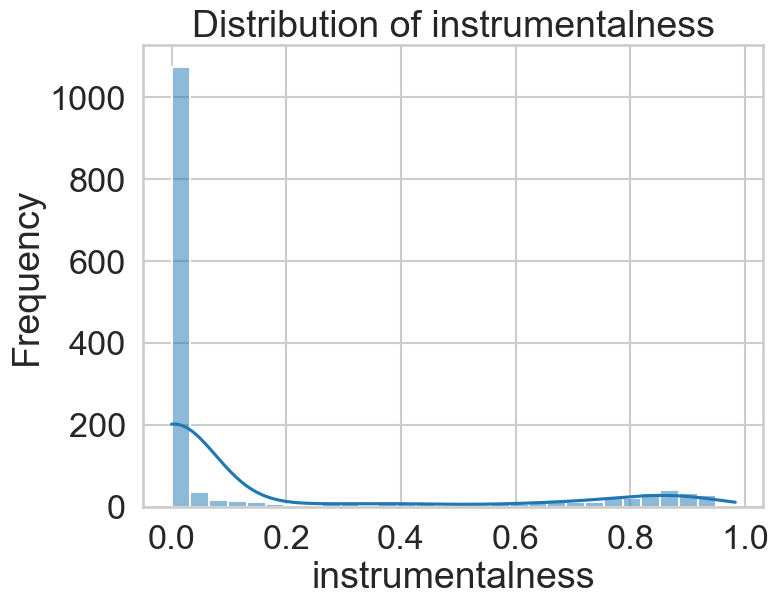

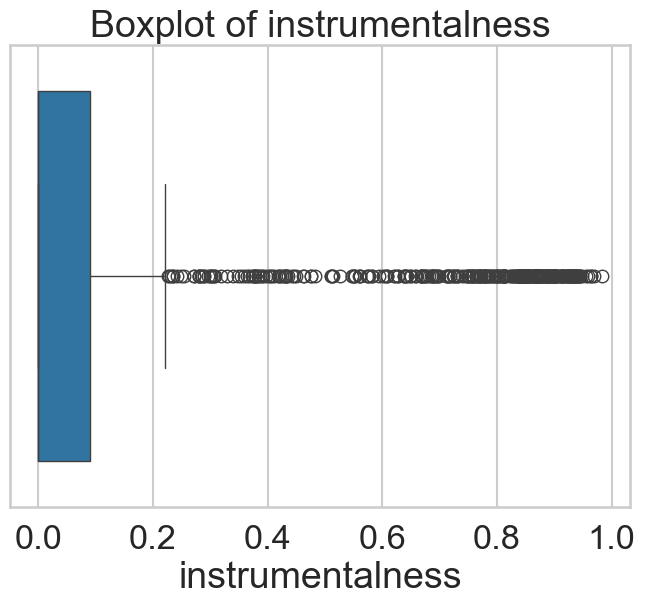

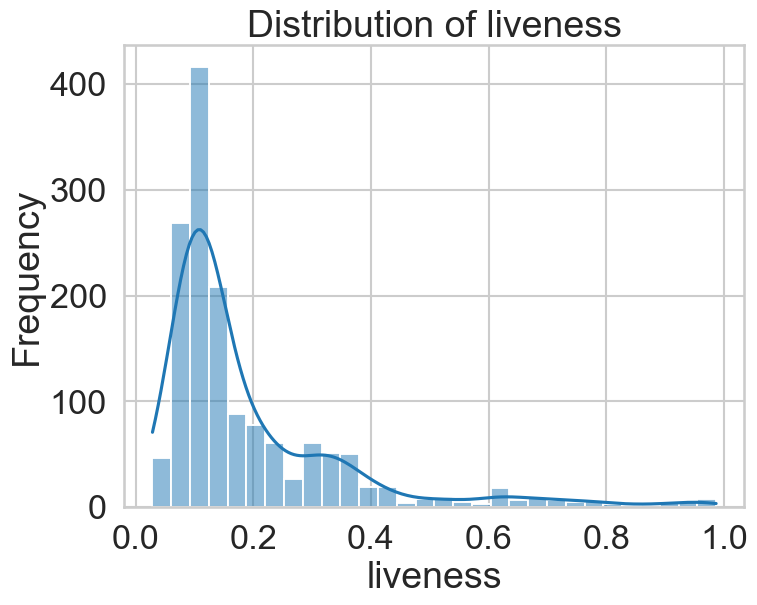

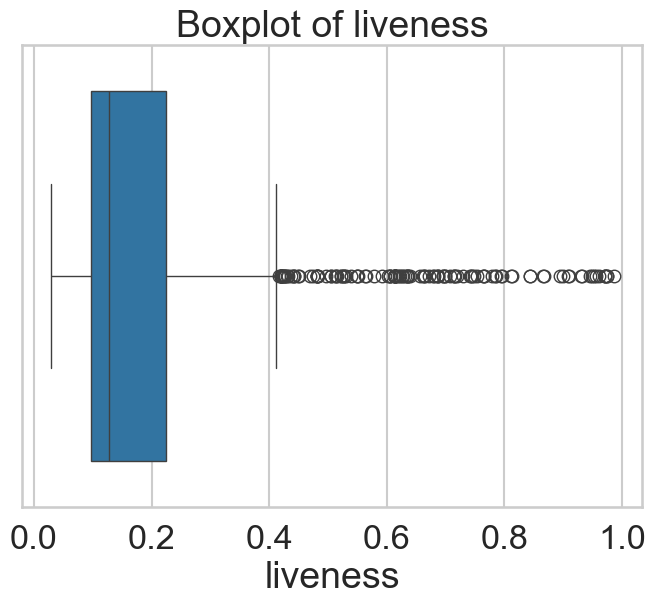

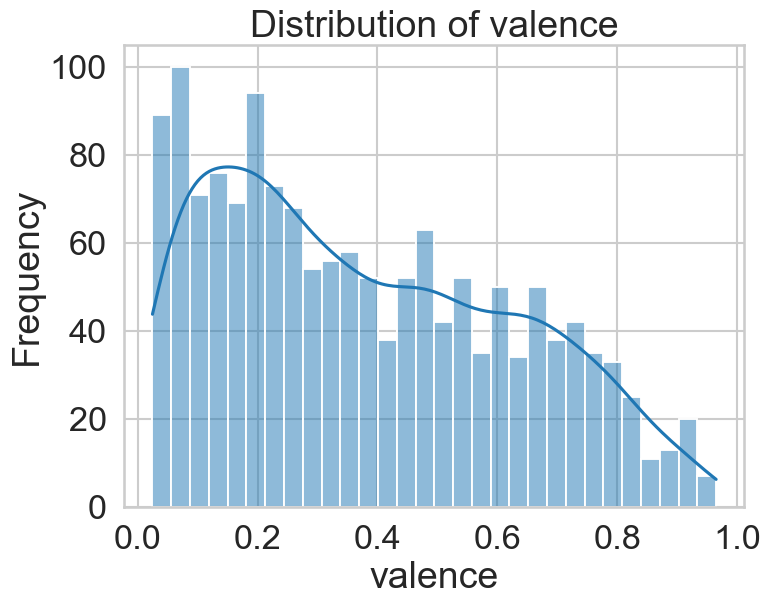

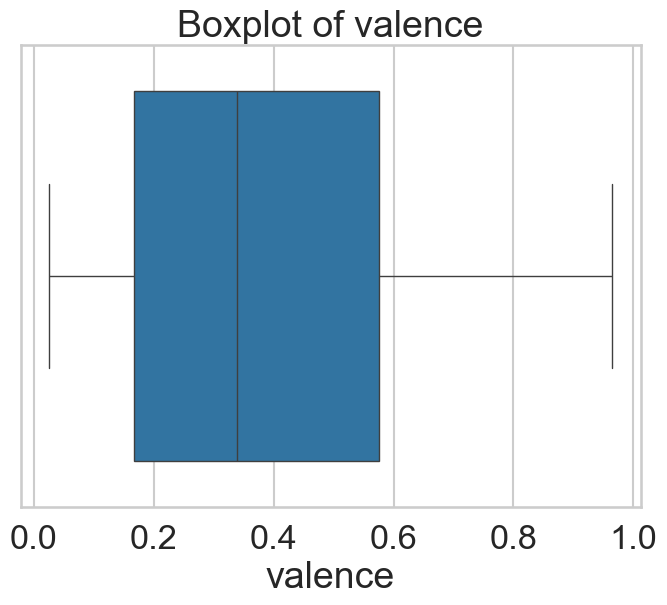

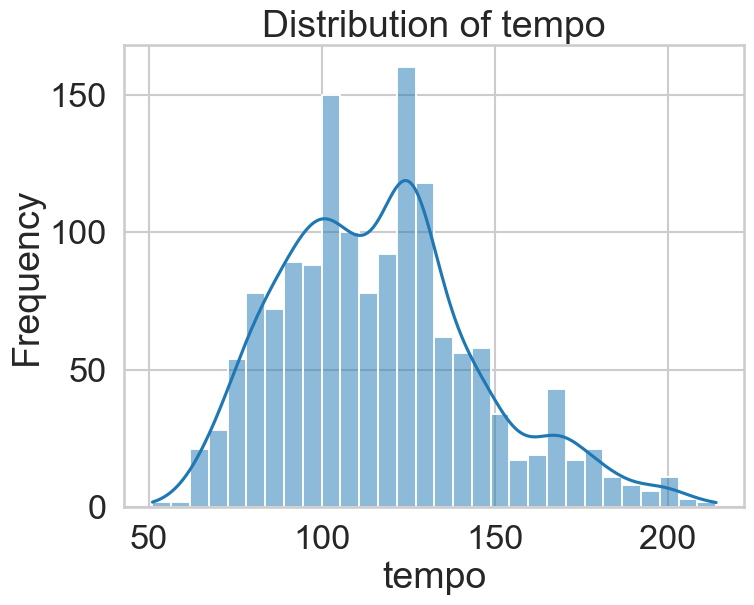

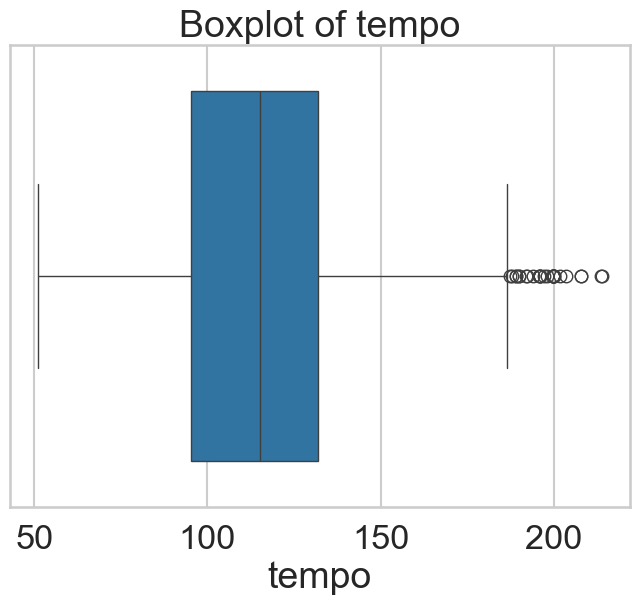

In [145]:
# histograms and boxplots
num_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feature in num_features:
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

### Popularity
- The histogram tells us that most tracks have low popularity scores, with a lot of tracks being clustered at 0
- The distribution is right skewed, with only few tracks getting to to high popularity
- There are some bumps around 25 and 50 suggesting that some songs cluster at those levels
- The boxplot confirms this by showing the median of around 25 and a long tail towards the higher values
- There are very few tracks that have popularity over that 80 mark, which makes them rare compared to the rest

- Popularity data is skewed towards the lower values so for classification, it could be better to convert popularity into a binary label, popular vs not popular based on the median value

### Danceablity
- The histogram tells that, that the danceability scores are spread out quite fairly, but with most tracks being centered betwween around 0.4 and 0.8
- The distribution is close to being symmetric, as it doesn't really have any strong skeweness
- There are bumps near around 0.6 meaning that a lot of the tracks have a medium danceability 
- The boxplot is showing that the median danceability is around 0.57 and the spread below the media is a little bit wider than the spread above the median
- There are no strong outliers

- Danceability measures how easy it is to dance to a track, so it could help clustering algorithms to seperate more upbeat tracks like club and dance from less danceable ones like opera 

### Energy
- The histogram tells us that most tracks have a moderator to high energy, withthe peak being between around 0.7 and 0.9
- The distributin is skewed to the left, meaning there are more high energy tracks than low energy tracks
- The boxplot shows that the median energy is around 0.63 and there is a wider spread below the median than above the median
- There are no strong outliers

- It could help clustering algoritms group songs into categories like high energy tracks such as club or dance vs low energy tracks like opera

### Loudness
- The histogram tells us that most tracks have loudness between around -8dB and -3.5dB with the peak being around -6dB
- The distribution is left skewed with a long tail towards low loudness down to almost -40dB
- The boxplot shows that there are many low loudness outliers which shows that there are some tracks that much more quieter than typical tracks
- The median loudness from the boxplot is around -6.5dB

- It could help clustering alghorithms to group louder genres like club and dance separately from quiter genres like opera

### Speechiness
- The histogram tells us that most tracks have very low speechiness, clustered at around 0.04
- The distribution is heavily right skewed with a long tail towards higher speechiness
- The boxplot also confirms that almost all the tracks are not high in speechiness, but shows many outliers in moderate speechiness and few in high speechiness
- The median is around 0.04

- Speechines could be used to separate tracks that contain more words like some operas from normal music tracks like club and dance

### Acousticness
- The distribution is skewed but shows two bigger peaks, one at 0 and a smaller one near 1, suggesting two different types of tracks with very low and very high acousticness
- This tells us that the dataset might include both electronic/dance tracks and pure acoustic tracks
- The boxplot shows that the median is quite low at around 0.14
- There are no strong outliers as this column covers the full 0-1 range

- It could help for clustering tracks, helping to tell the difference between electronic genres like club and dance and more acoustic styles like opera

### Instrumentalness
- The histogram tells us that the most tracks have very low instrumentalness as they are clustered at around 0
- The distribution is heavily right-skewed with only a small number of tracks having high instrumentalness
- The boxplot shows that the majority of tracks include vocals and there are a lot of outliers that represent instrumental tracks
- The median is at 0

- It could help clustering algorithms to tell the difference between vocal tracks like club and dance from fully instrumental tracks which could be some operas

### Liveness
- The histogram tells us that the most tracks have low liveness, mostly betwewen 0.05 and 0.2
- The distribution is heavily right skewed, with only few tracks showing high liveness
- The boxplot shows that the majority of tracks are recorded in a studio, with a small amount of outliers being performed live
- The median is around 0.13

- it could be used to seperate tracks that are produced in a studio like club and dance from those performed live like operas

### Valence
- Histogram tells us that most tracks have a lower valence value, most of them being between 0.03 and 0.25
- The distribution is right skewed, telling us that tracks with more serious, sad tone are more common
- The boxplot shows that the median is around 0.33 and there is a wider spread above the median than below
- Tracks that are more happy and cheerful are less frequrent than sad tracks
- There aren't any outliers

- It could be helpful to differentiate more serious genres like opera from happier tracks like dance or club

### Tempo
- The histogram tells us that most tracks have a tempo between around 90 and 130BPM
- There are two small peaks around 100 and 125 BPM
- From the boxplot we can tell that the median tempo is around 115 BPM
- There are few outliers that have very high tempos above around 185 BPM

- it could be used to help separate fast ppaced tracks like dance or club from slower operas

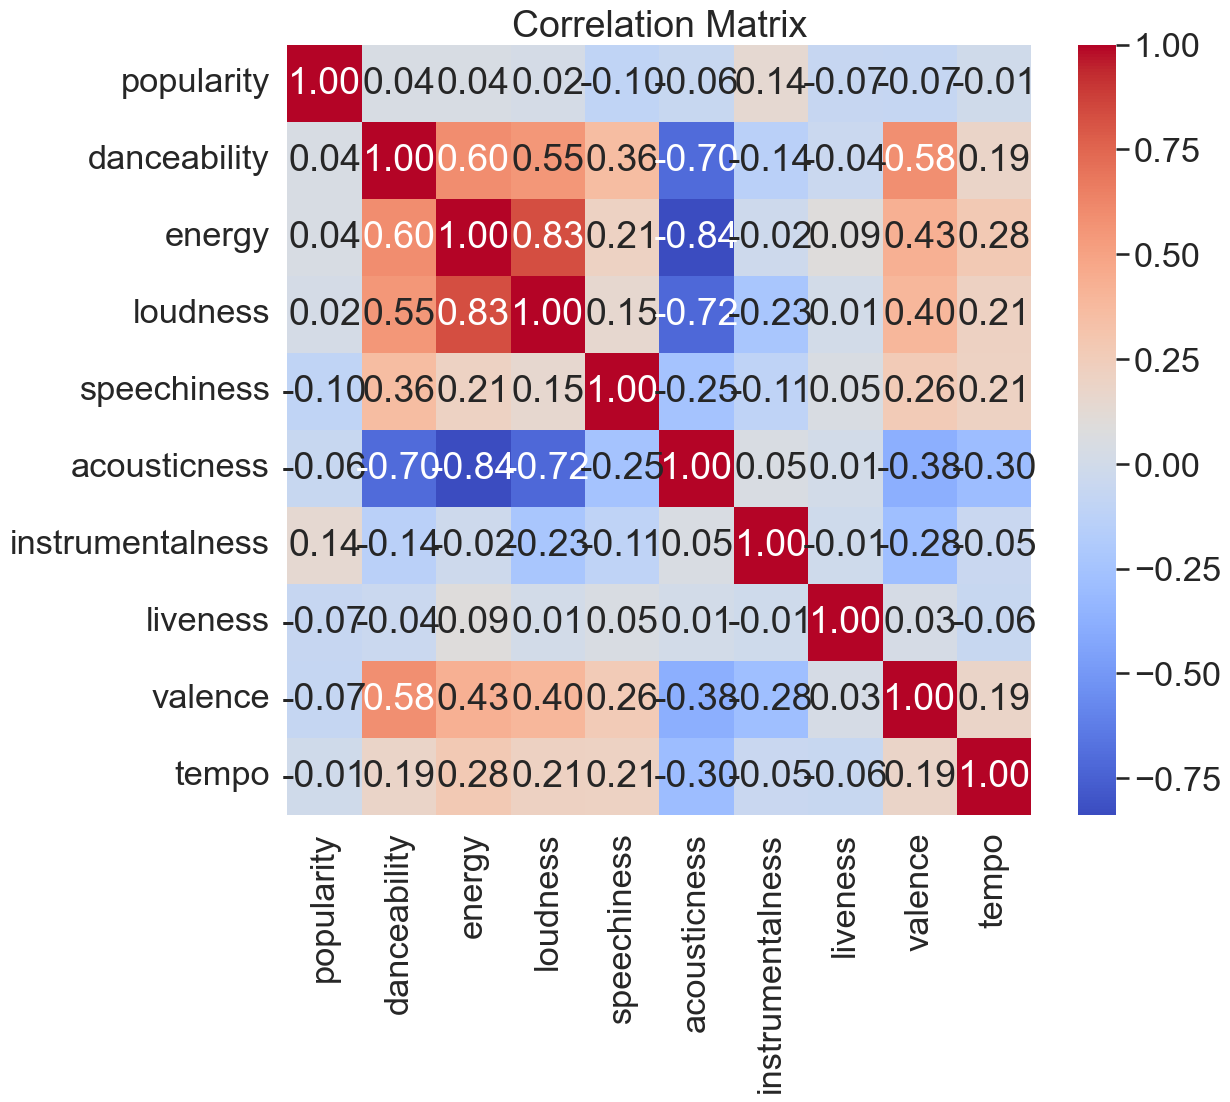

In [147]:
# correlation matrix heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Observations from the Correlation Heatmap
- Energy and Loudness have a high correlation of 0.83, which means that louder tracks tend to be more energetic
- Energy and Danceability have a bit above medium correlation of 0.60, meaning trakcs with higher energy are more often danceable than not
- Valence and Danceability also show a positive correlation of 0.58, meaning that happier tracks are more danceable
- Acousticness has a negative correlations with both Energy, being -0.84 and Loudnes, being -0.72, those values are to be normal as acoustic tracks are usdually more quiet and less energetic
- Popularity does not show any strong correlation with any other feature meaning that it might be influenced by multiple factors rather than a single attribute
- Instrumentalness seems to be independent from the other features, meaning that it could provide unique information
- Speechiness shows low correlations with all the other attributes, showing that tgracks with more speechiness are not really linked with any other features
- Liveeness also shows low correlations, meaning that the track being a live performance is independent from energy or loudness
- Tempo has weak but positive correlations with Energy and Danceability, meaning that fast paced tracks might be a bit more energetic and danceable but this relationship is not really strong

- These observations can help later on, for example when identifying redundant features such as Energy and Loudness, or independent features that could be more informative like Instrumentalness and Tempo 


<Figure size 1800x1800 with 0 Axes>

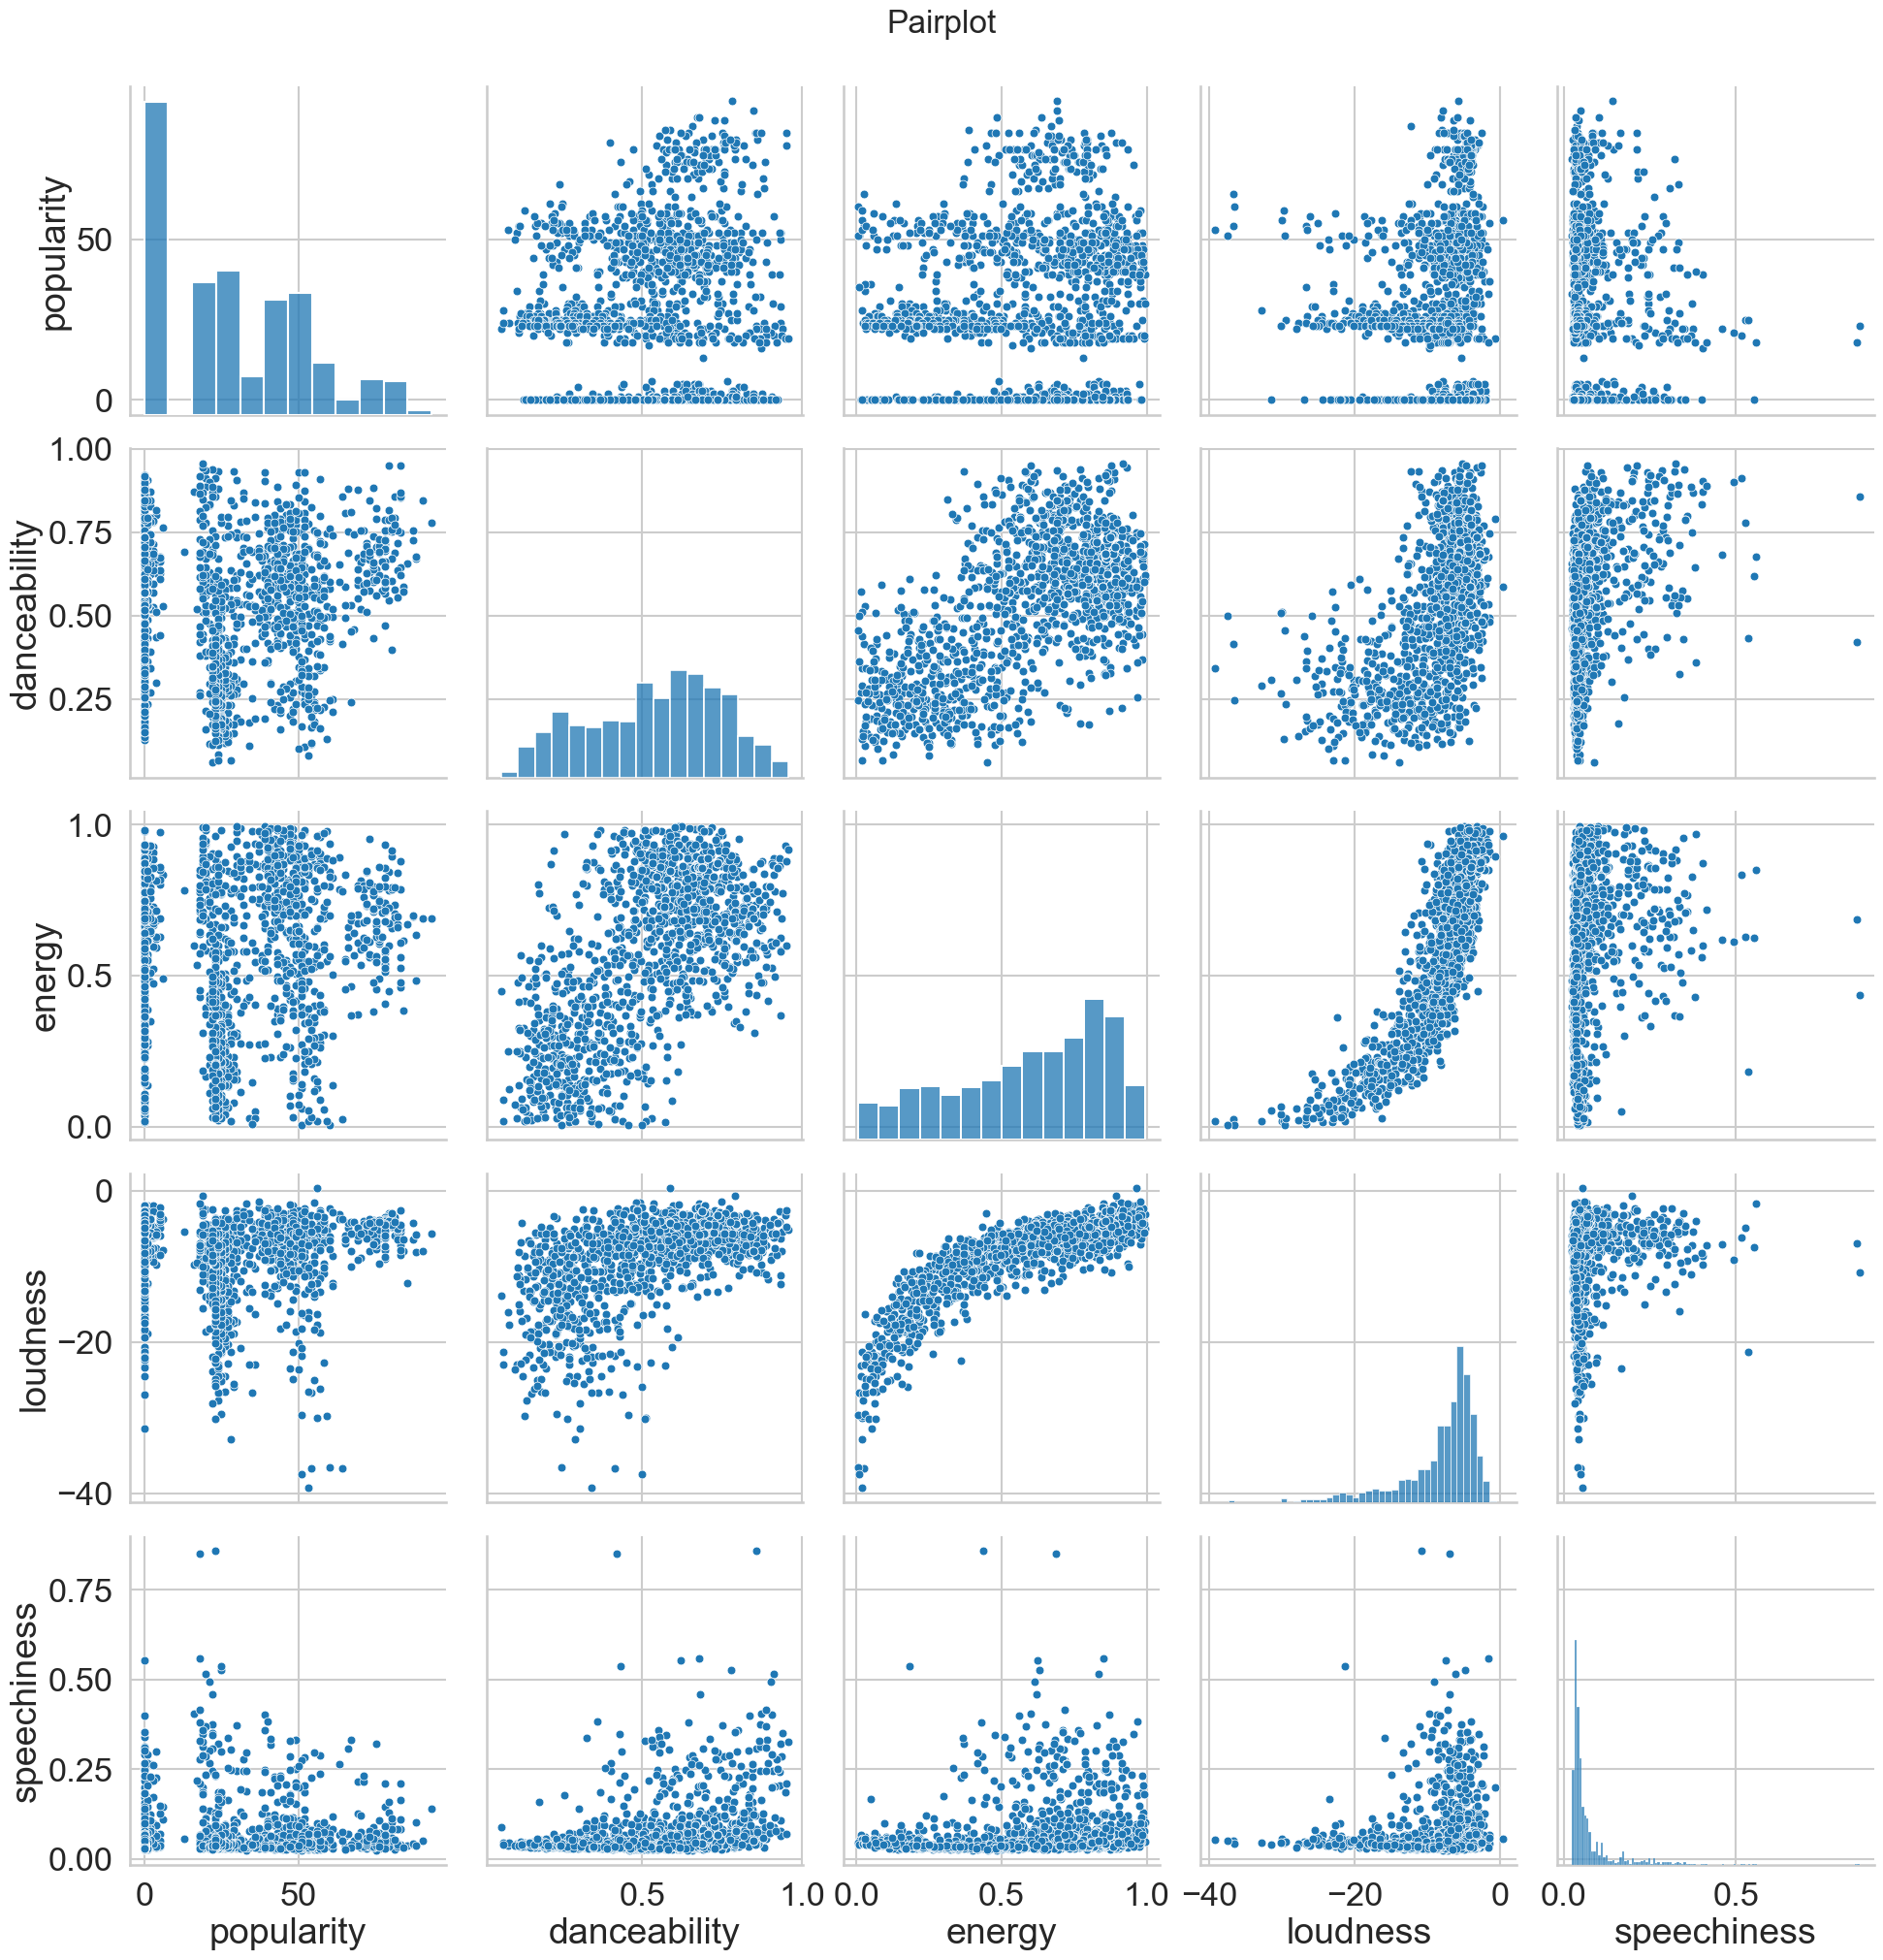

In [149]:
# pairplot
plt.figure(figsize=(18, 18))

pairplot = sns.pairplot(
    df[num_features[:5]].dropna(),
    height=4,
    aspect=1,
    plot_kws={'s': 40}
)

pairplot.fig.suptitle('Pairplot', y=1.02, fontsize=24)
plt.show()

### Pairplot Observations
#### Popularity vs Danceability
- the plot shows no strong relationship between danceability and popularity
- the points are scattered across all levels of popularity from 0 to around 80, which means that tracks can be both highly popular or unpopular regardless of their danceability
- more popular tracks of around above 60 look to have danceability values mostly above 0.5, meaning that more danceable songs might be more popular
- tracks with very low populartiy close to 0 are spread across the entire range of danceability, proving that high danceability by itself does not determine if the song will be popular
- danceability on its own is not a strong indicator of the track's popularity

#### Popularity vs Energy
- the plot showws no clear relationship between energy and popularity
- tracks with 0 popularity have a wide range of energy values from 0 to close to 1, meaning that energy by itself does not mean the track will be popular
- popular tracks of above around 60, seem to have medium, above 0.5 to high around 0.9 energy, but the spread is inconsisent
- most of the songs regardless of their popularity seem to cluster between around 0.5 and 1 energy, meaning that high energy tracks are more common in the dataset, but not more popualr
- there is no clear indication to say that energy is a strong factor for making a track popular

#### Popularity vs Loudness
- there is no strong relationship between popularity and loudness
- tracks across the entire range of loudness from very quiet to loud have a wide spread of popularity which includes tracks with 0 popularity
- there is a slight pattern where tracks with higher loudness closer to 0dB seem to have more tracks with medium to higher popularity but the points are scattered
- popularity appears to be inddependent of loudness

#### Popularity vs Speechiness
- most of the tracks have low speechiness of below 0.25 regardless of popularity
- there are only few high speechiness values of above 0.5 and they correspond to tracks with low popularity of below 30
- from this we can tell that there is no positive or negative correlation between speechines and popularity
- popular tracks of around 50 to 90 have mostly low speechines ranging from around 0 to 0.2 with few outliers above
- this shows that popular tracks tend to to be more musical than speech heavy

#### Danceability vs Speechiness
- most tracks are clustering around low speechiness close to 0 and medium to high danceability from around 0.4 to 0.9
- tracks with low danceability of below 0.3 also have low speechiness
- with danceability increasing, the speechiness mostly stays low but as dencability goes above 0.5, we can see higher speechiness values can be seen more often
- tracks with high speechiness of above 0.4 are very rare but they are mostly at medium to high danceability
- there is no strong correlation between these two features but tracks with higher danceability show a higher chance of having higher speechiness outliers

#### Danceability vs Loudness
- there is a positive relationship between danceability and loudness as tracks with higher danceability can be seen to be louder, while tracks that have lower danceability are more spread out and often more quiet
- tracks with danceability below 0.5 show a bigger range of loudness that include very quiet tracks of -20dB and lower
- with danceability increasing above 0.5, most tracks are clustering around the higher loudness values of around -10dB to 0dB, meaning that more danceable tracks are usually louder
- from this we can say that louder tracks are more likely to be highly dancable

#### Danceability vs Energy
- the plot is showing a medium positive correlation between danceability and energy
- as the energy increases, danceability also increases, which means that more energetic tracks are often more danceable
- there is still a good amount of spread, meaning that not all energetic tracks are highly danceable and the other way around
- the relationship is not perfectly linear but there is a trend that we can spot where tracks with low energy tend to have lower danceability, and tracks with higher energy of around 0.7 to 1 have medium to high danceability of 0.50 and above
- there are few tracks with lower energy that show medium danceability meaning there are still some exceptions to the trend
- this positive relationship makes sense as usually tracks that are more energetic make them easier to dance to

#### Energy vs Speechiness
- most tracks have low speechines being close to 0 regardless of their energy levels
- as the energy goes higher, speechiness remains mostly low with very tracks showing moderate speechiness at higher levels of energy
- there are few outliers where tracks have speechiness above 0.4 but those are rare and dont form any sort of a trend
- the graph shows that speechiness is not strongly correlated with energy but a track can be energetic and still not have much words spoken in it
- a slight higher spread of speechiness can be noticed for higher energy tracks around 0.5 to 1 where tracks show medium levels of speechiness

#### Energy vs Loudness
- there is a clear positive correlation between loudness and energy
- as energy increases, loudness also increases so tracks with higher energy tend to be louder closer to 0dB
- tracks with low energy around 0 to 0.4 are mostly low loudness of around below -20dB
- tracks with higher energy of around 0.7 to 1 are mostly high loudness of values between around -10dB and 0dB
- the points show an upward curve that tells us that louder tracks are often more energetic
- there are few outliers of low energy tracks being a somewhat loud but those are rare

#### Speechiness vs Loudness
- the relationship between those two is weak and scattered
- most tracks have low speechiness of below 0.2 regardless if the track is loud or not
- there are few tracks with higher speechiness and they tend to have higher loudness values
- there is no trend showing that louder tracks have more or less speech in them